In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import missingno as msno
import pandas as pd
from pandas import DataFrame
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse
from matplotlib.ticker import AutoMinorLocator

import time

%matplotlib inline

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  

In [2]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [3]:
data = pd.read_csv("/content/drive/MyDrive/data_projet4_clean.csv", sep = ",")
data2 = pd.read_csv("/content/drive/MyDrive/data_projet4_clean_no_outliers.csv", sep = ",")

data = data.drop(columns=['Unnamed: 0'])
data2 = data2.drop(columns=['Unnamed: 0'])

data["ZipCode"] = data["ZipCode"].astype(int)
data2["ZipCode"] = data["ZipCode"].astype(int)

In [ ]:
data.head()

In [ ]:
data.dtypes

In [ ]:
print(data.shape)
print(data2.shape)

(1632, 43)
(1202, 43)


In [ ]:
a = []
b = []
c = []
d = []                                     

for columns in data.columns : 
  a.append(columns)
  b.append(data[columns].notna().mean() *100)
  c.append(len(data[columns].unique()))
  d.append(data[columns].dtype)

data_quality = DataFrame(data = a, columns = ["Nom colonne"]) 
data_quality["% remplie"] = b   
data_quality["Nombre de valeurs uniques"] = c 
data_quality["Type de la colonne"] = d    

data_quality

Nom colonne   % remplie  Nombre de valeurs uniques  \
0                     OSEBuildingID  100.000000                       1632   
1                      BuildingType  100.000000                          5   
2               PrimaryPropertyType  100.000000                         21   
3                      PropertyName  100.000000                       1628   
4                           Address  100.000000                       1612   
5                           ZipCode  100.000000                         48   
6     TaxParcelIdentificationNumber  100.000000                       1552   
7               CouncilDistrictCode  100.000000                          7   
8                      Neighborhood  100.000000                         13   
9                          Latitude  100.000000                       1466   
10                        Longitude  100.000000                       1379   
11                        YearBuilt  100.000000                        113   
12                NumberofBuildings  100.000000                         16   
13                   NumberofFloors  100.000000                         44   
14                 PropertyGFATotal  100.000000                       1558   
15               PropertyGFAParking  100.000000                        319   
16           PropertyGFABuilding(s)  100.000000                       1552   
17        ListOfAllPropertyUseTypes  100.000000                        360   
18           LargestPropertyUseType  100.000000                         54   
19        LargestPropertyUseTypeGFA  100.000000                       1535   
20     SecondLargestPropertyUseType   51.225490                         48   
21  SecondLargestPropertyUseTypeGFA   51.225490                        686   
22      ThirdLargestPropertyUseType   20.955882                         40   
23   ThirdLargestPropertyUseTypeGFA   20.955882                        293   
24                  ENERGYSTARScore   65.931373                        101   
25                 SiteEUI(kBtu/sf)  100.000000                        947   
26               SiteEUIWN(kBtu/sf)  100.000000                        962   
27               SourceEUI(kBtu/sf)  100.000000                       1243   
28             SourceEUIWN(kBtu/sf)  100.000000                       1285   
29              SiteEnergyUse(kBtu)  100.000000                       1618   
30            SiteEnergyUseWN(kBtu)  100.000000                       1608   
31                   SteamUse(kBtu)  100.000000                        115   
32                 Electricity(kWh)  100.000000                       1622   
33                Electricity(kBtu)  100.000000                       1622   
34               NaturalGas(therms)  100.000000                       1170   
35                 NaturalGas(kBtu)  100.000000                       1170   
36                      DefaultData  100.000000                          2   
37                 ComplianceStatus  100.000000                          3   
38                TotalGHGEmissions  100.000000                       1562   
39            GHGEmissionsIntensity  100.000000                        462   
40                      BuildingAge  100.000000                        113   
41                   ParkingPercent  100.000000                        323   
42                       HasParking  100.000000                          2   

   Type de la colonne  
0               int64  
1              object  
2              object  
3              object  
4              object  
5               int64  
6              object  
7               int64  
8              object  
9             float64  
10            float64  
11              int64  
12            float64  
13              int64  
14              int64  
15              int64  
16              int64  
17             object  
18             object  
19            float64  
20             object  
21            float64  
22             object  
23            f

Description des colonnes : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

Les colonnes à **prédire** sont : TotalGHGEmissions (émissions de CO²) et SiteEnergyUse(kBtu) (consommation totale d'énergie)

In [ ]:
data["BuildingType"].value_counts()

NonResidential        1427
SPS-District K-12       97
Nonresidential COS      84
Campus                  23
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [ ]:
data["LargestPropertyUseType"].value_counts()

Office                                                  490
Non-Refrigerated Warehouse                              199
K-12 School                                             137
Retail Store                                             97
Other                                                    95
Hotel                                                    75
Worship Facility                                         69
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           41
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
College/University                                       24
Residence Hall/Dormitory                                 22
Other - Entertainment/Public Assembly                    21
Senior Care Community                   

In [ ]:
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    287
Other                          246
Warehouse                      187
Large Office                   169
K-12 School                    137
Mixed Use Property             104
Retail Store                    89
Hotel                           74
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           27
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

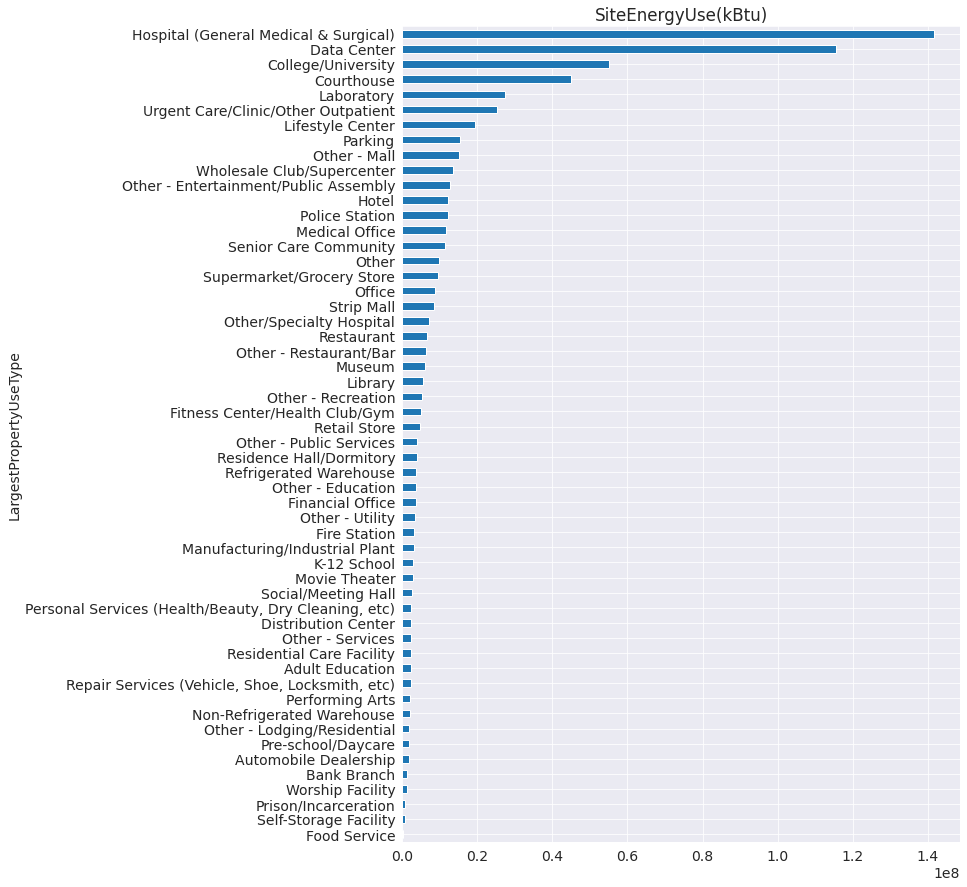

In [ ]:
data.groupby(["LargestPropertyUseType"])["SiteEnergyUse(kBtu)"].mean().sort_values().plot(kind="barh", figsize=(10,15), xlabel="LargestPropertyUseType", title="SiteEnergyUse(kBtu)")
plt.show()

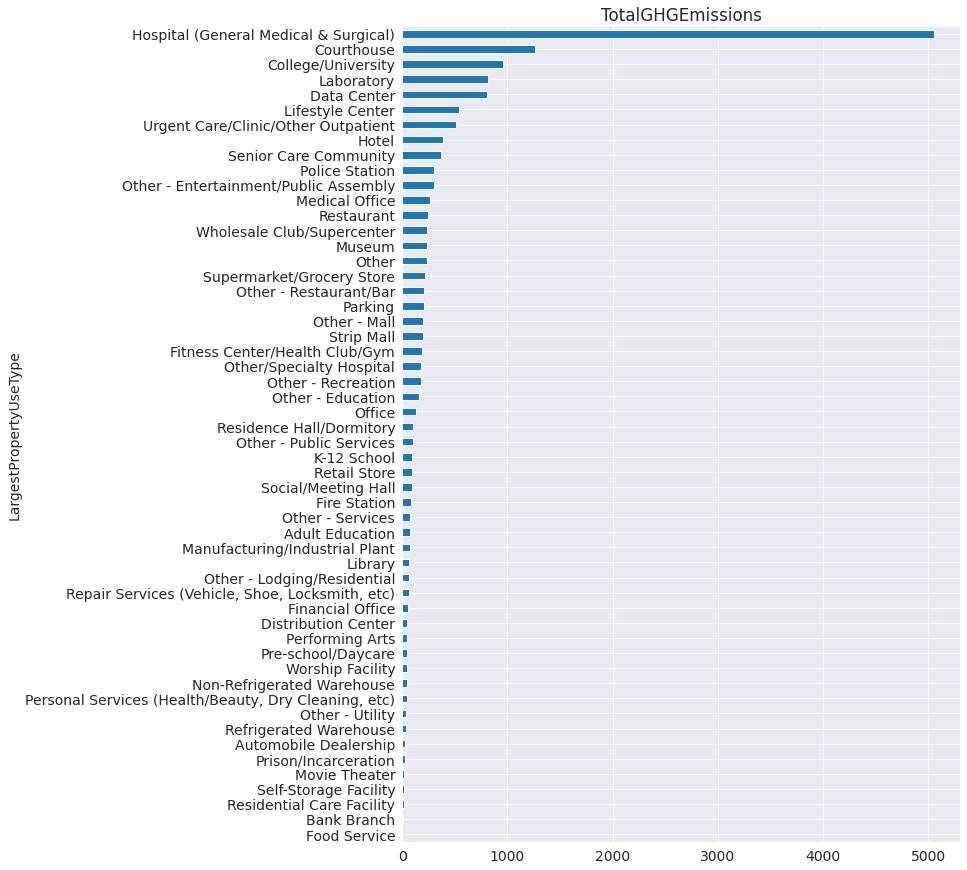

In [ ]:
data.groupby(["LargestPropertyUseType"])["TotalGHGEmissions"].mean().sort_values().plot(kind="barh", figsize=(10,15), xlabel="LargestPropertyUseType", title="TotalGHGEmissions")
plt.show()

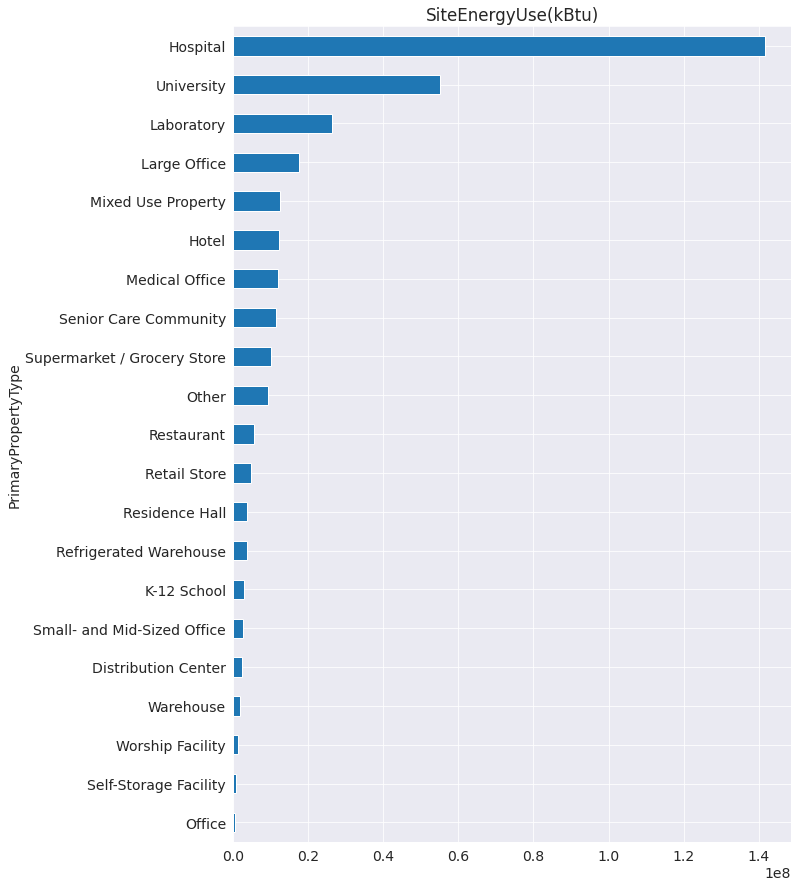

In [ ]:
data.groupby(["PrimaryPropertyType"])["SiteEnergyUse(kBtu)"].mean().sort_values().plot(kind="barh", figsize=(10,15), xlabel="PrimaryPropertyType", title="SiteEnergyUse(kBtu)")
plt.show()

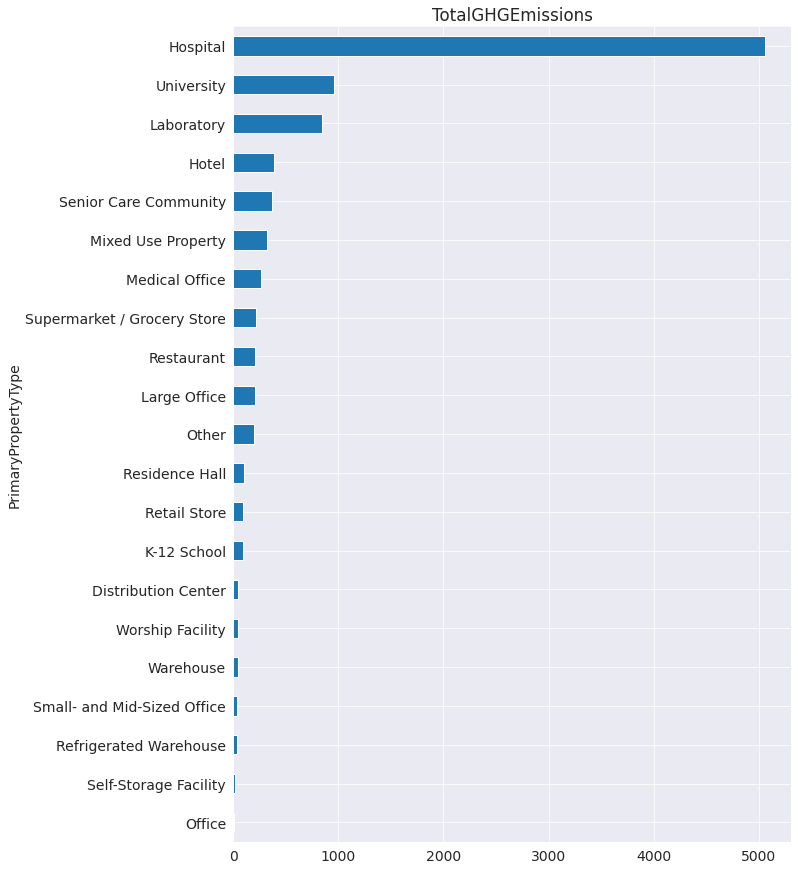

In [ ]:
data.groupby(["PrimaryPropertyType"])["TotalGHGEmissions"].mean().sort_values().plot(kind="barh", figsize=(10,15), xlabel="PrimaryPropertyType", title="TotalGHGEmissions")
plt.show()

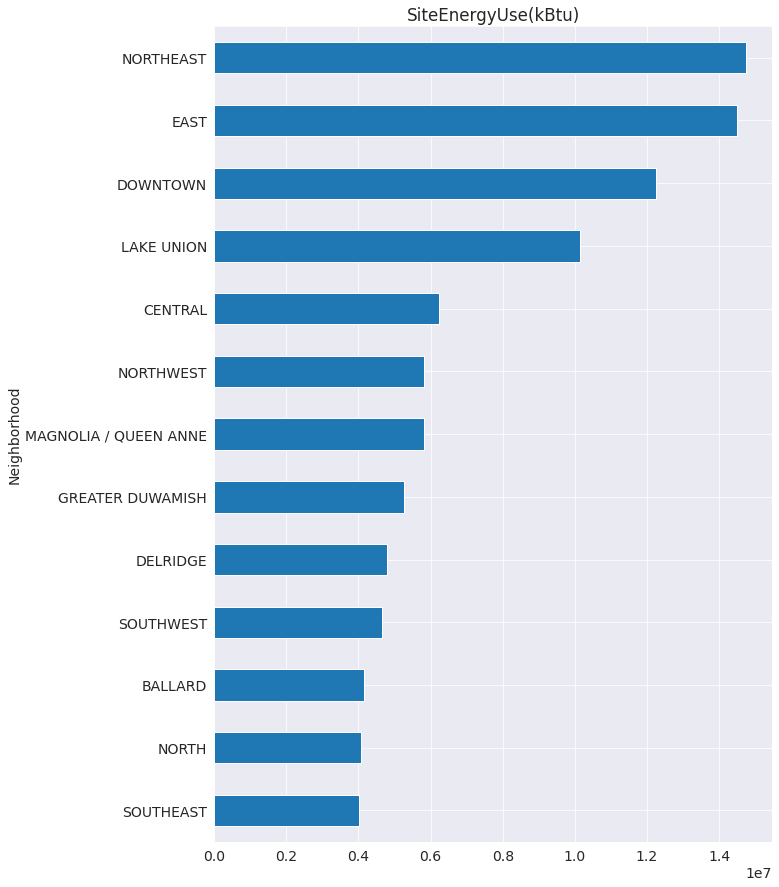

In [ ]:
data.groupby(["Neighborhood"])["SiteEnergyUse(kBtu)"].mean().sort_values().plot(kind="barh", figsize=(10,15), xlabel="Neighborhood", title="SiteEnergyUse(kBtu)")
plt.show()

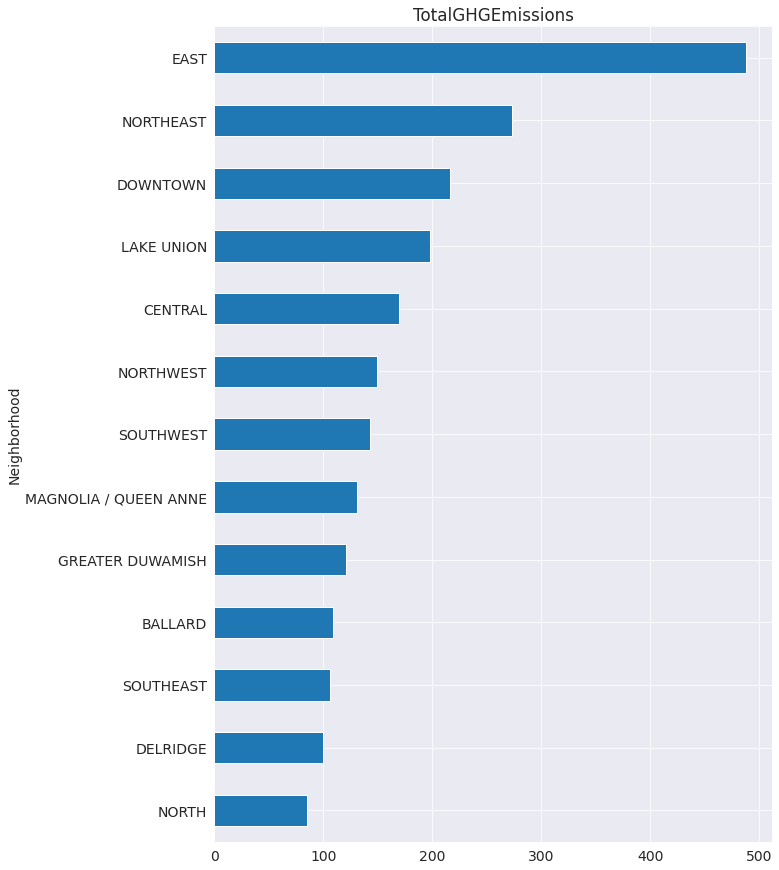

In [ ]:
data.groupby(["Neighborhood"])["TotalGHGEmissions"].mean().sort_values().plot(kind="barh", figsize=(10,15), xlabel="Neighborhood", title="TotalGHGEmissions")
plt.show()

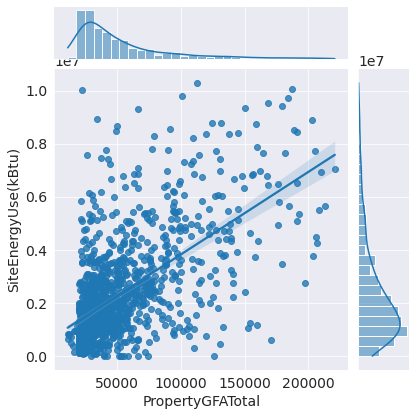

In [ ]:
sns.jointplot(x="PropertyGFATotal", y="SiteEnergyUse(kBtu)", data=data2, kind='reg');

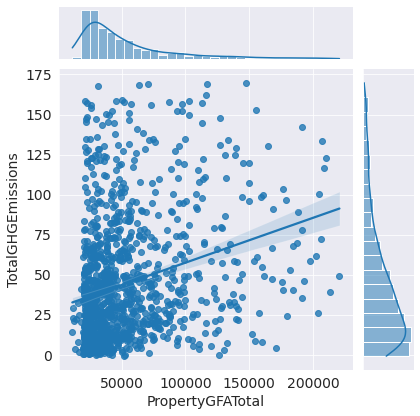

In [ ]:
sns.jointplot(x="PropertyGFATotal", y="TotalGHGEmissions", data=data2, kind='reg');

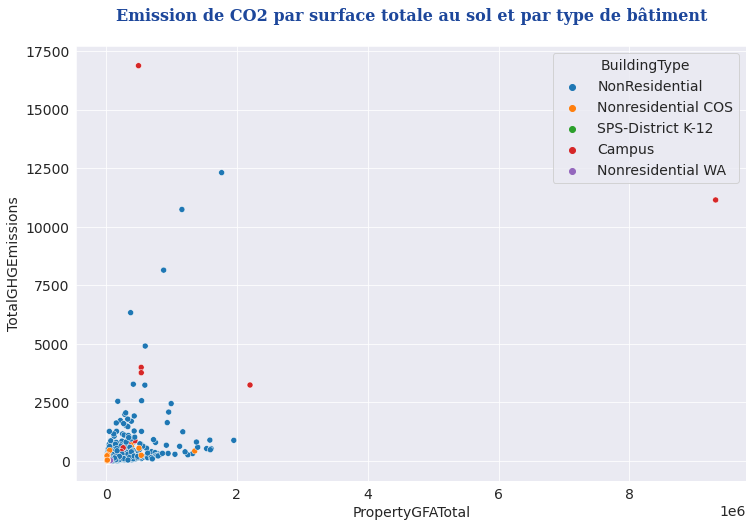

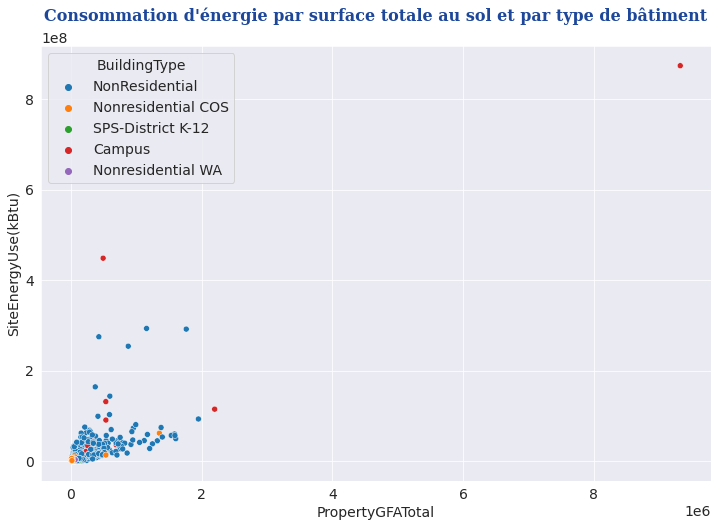

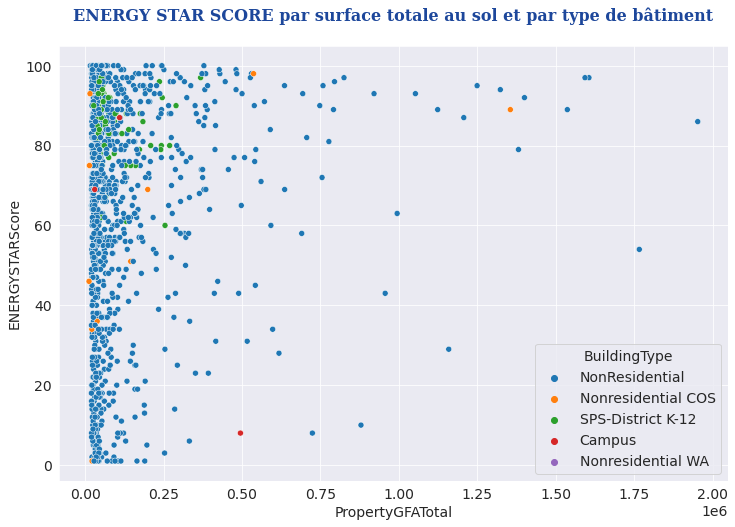

In [ ]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Emission de CO2 par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommation d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='ENERGYSTARScore', hue='BuildingType')
plt.title(f"ENERGY STAR SCORE par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

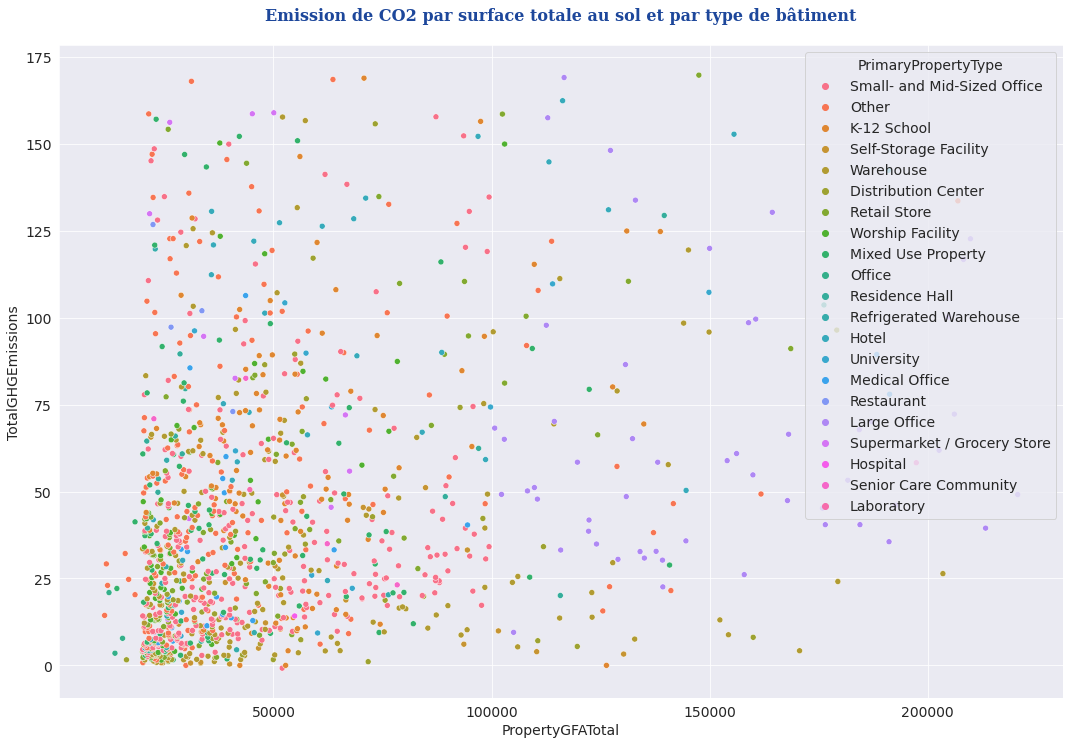

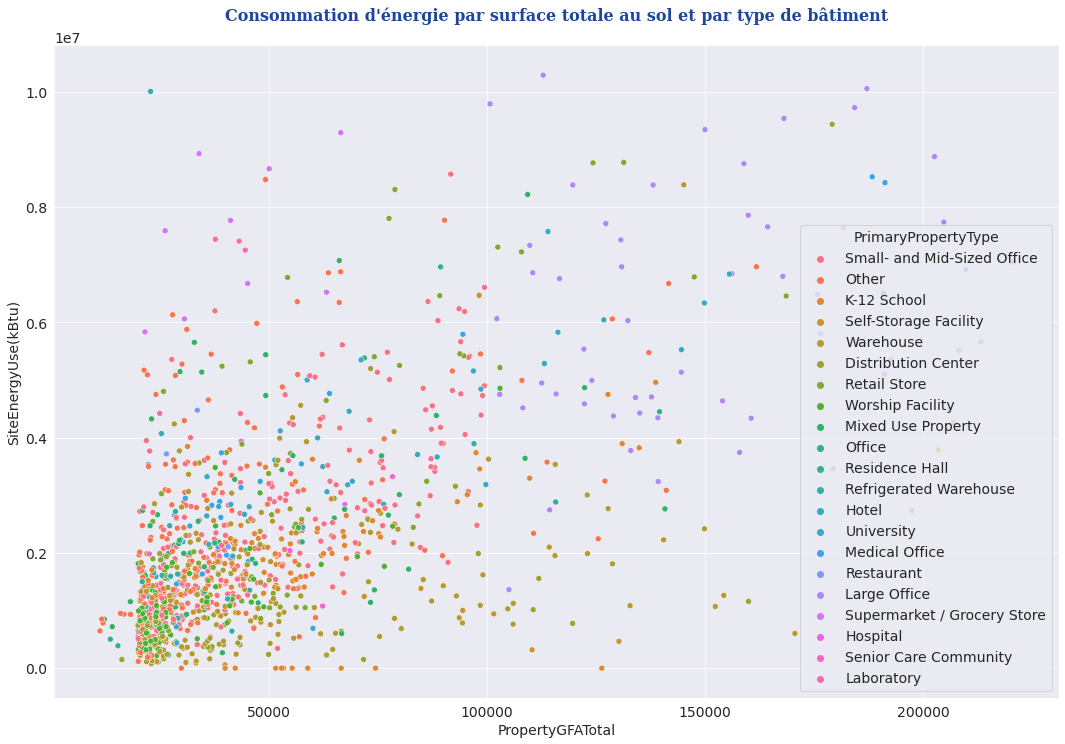

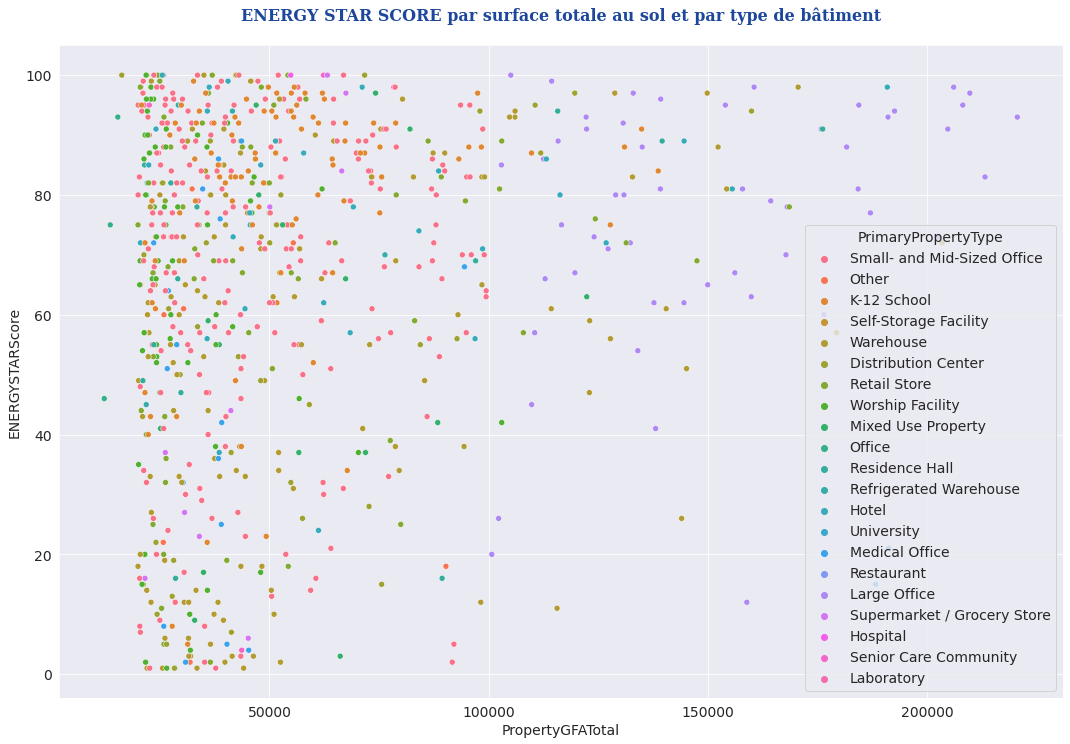

In [ ]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
fig = plt.figure(figsize=(18,12))
sns.scatterplot(data = data2, x='PropertyGFATotal', y='TotalGHGEmissions', hue='PrimaryPropertyType')
plt.title(f"Emission de CO2 par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)

fig = plt.figure(figsize=(18,12))
sns.scatterplot(data = data2, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='PrimaryPropertyType')
plt.title(f"Consommation d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)

fig = plt.figure(figsize=(18,12))
sns.scatterplot(data = data2, x='PropertyGFATotal', y='ENERGYSTARScore', hue='PrimaryPropertyType')
plt.title(f"ENERGY STAR SCORE par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

In [ ]:
fig = px.histogram(data,
                   x="YearBuilt",
                   marginal="box",
                   nbins=115,
                   title="Ancienneté des bâtiments")
fig.update_layout(bargap=0.1)
fig.show()

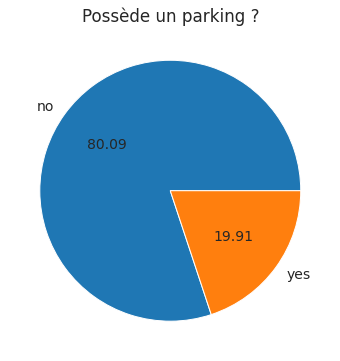

In [ ]:
series = data["HasParking"].value_counts()
series.plot(kind='pie', label="", title="Possède un parking ?", autopct='%.2f', figsize=(6, 6))

In [ ]:
fig = px.histogram(data.loc[data["ParkingPercent"] != 0],
                   x="ParkingPercent",
                   marginal="box",
                   color_discrete_sequence=['red'],
                   nbins=20,
                   title="Pourcentage de la surface en parking (uniquement pour les bâtiments en possédant)")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data2,
                   x = "SiteEnergyUse(kBtu)",
                   marginal = "box",
                   color = "HasParking",
                   color_discrete_sequence=["grey", "green"],
                   title = "Consommation d'énergie")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
px.histogram(data, x="PrimaryPropertyType", color="HasParking", title="Types de bâtiments possédant ou non un parking")

In [ ]:
fig = px.scatter(data,
                 x="BuildingAge",
                 y="SiteEnergyUse(kBtu)",
                 color="HasParking",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["PrimaryPropertyType"],
                 title="Âge du bâtiment / Consommation d'énergie")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x="PropertyGFATotal",
                 y="SiteEnergyUse(kBtu)",
                 color="PrimaryPropertyType",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["BuildingAge","HasParking","PropertyName"],
                 title="Surface du bâtiment / Consommation d'énergie")
fig.update_traces(marker_size=5)
fig.show()

In [4]:
fig = px.scatter(data2,
                 x="PropertyGFATotal",
                 y="SiteEnergyUse(kBtu)",
                 color="PrimaryPropertyType",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["BuildingAge","HasParking","PropertyName"],
                 title="Surface du bâtiment / Consommation d'énergie")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x="NumberofFloors",
                 y="SiteEnergyUse(kBtu)",
                 color="PrimaryPropertyType",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["BuildingAge","HasParking","PropertyName"],
                 title="Nombre d'étages / Consommation d'énergie")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x="NumberofBuildings",
                 y="SiteEnergyUse(kBtu)",
                 color="PrimaryPropertyType",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["BuildingAge","HasParking","PropertyName"],
                 title="Nombre de bâtiments / Consommation d'énergie")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x="BuildingAge",
                 y="TotalGHGEmissions",
                 color="HasParking",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["PrimaryPropertyType"],
                 title="Âge du bâtiment / Emission de CO²")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x="PropertyGFATotal",
                 y="TotalGHGEmissions",
                 color="PrimaryPropertyType",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["BuildingAge","HasParking","PropertyName"],
                 title="Surface du bâtiment / Emission de CO²")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x="NumberofFloors",
                 y="TotalGHGEmissions",
                 color="PrimaryPropertyType",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["BuildingAge","HasParking","PropertyName"],
                 title="Nombre d'étages / Emission de CO²")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x="NumberofBuildings",
                 y="TotalGHGEmissions",
                 color="PrimaryPropertyType",
                 opacity=0.8,
                 render_mode="svg",
                 hover_data=["BuildingAge","HasParking","PropertyName"],
                 title="Nombre de bâtiments / Emission de CO²")
fig.update_traces(marker_size=5)
fig.show()

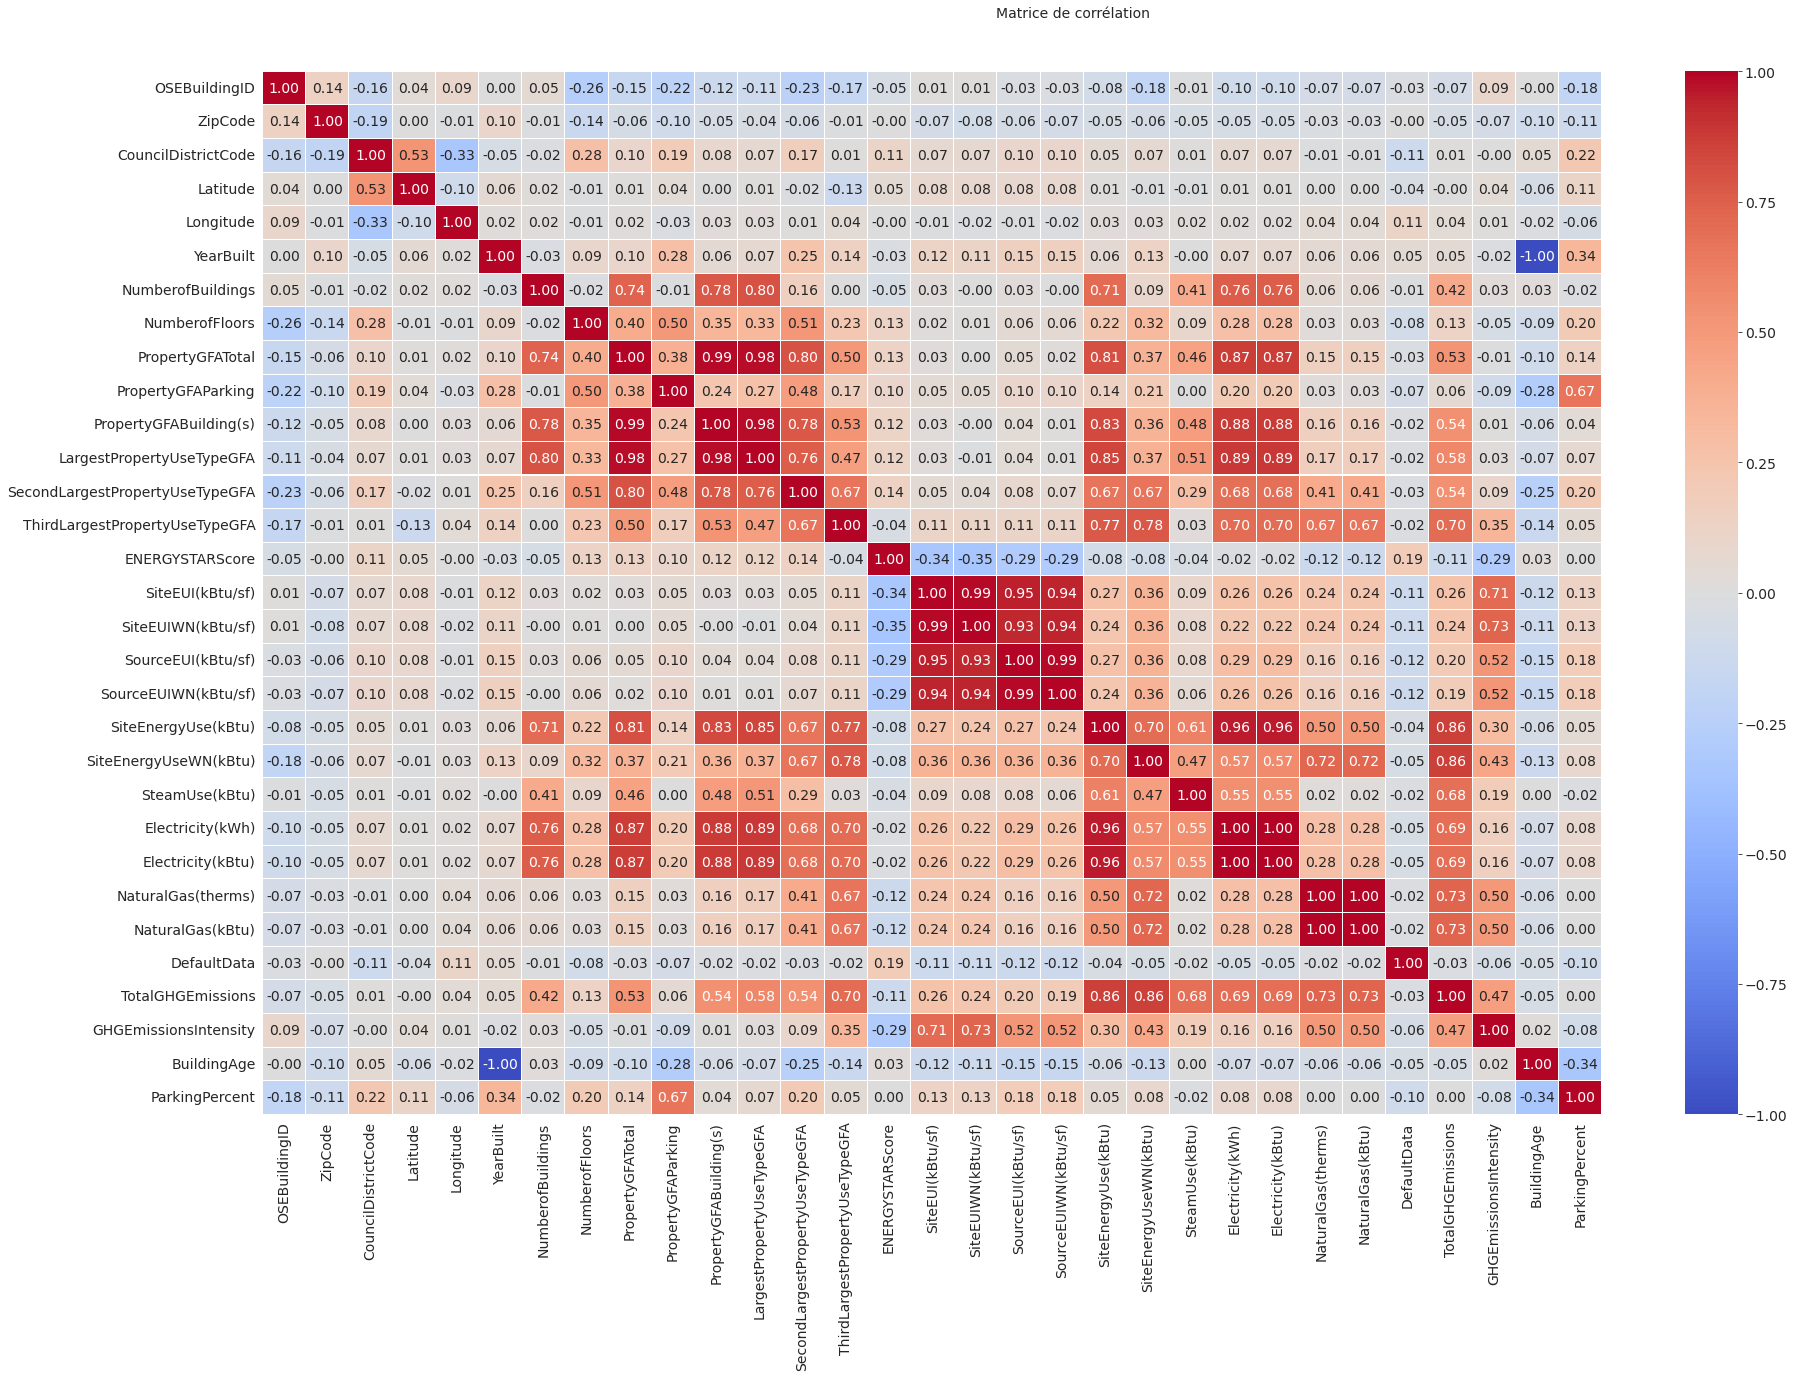

In [ ]:
f, ax = plt.subplots(figsize=(30, 18))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Matrice de corrélation', fontsize=14)

Encodage

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [ ]:
X = data[["BuildingType","PrimaryPropertyType","Neighborhood"]]

In [ ]:
encoder = OrdinalEncoder()
data["BuildingTypeEncoded"], data["PrimaryPropertyTypeEncoded"], data["NeighborhoodEncoded"] = encoder.fit_transform(X).T.astype(int)

In [ ]:
data.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way    98101   
1              Paramount Hotel  724 Pine street    98101   
2      5673-The Westin Seattle  1900 5th Avenue    98101   
3                    HOTEL MAX   620 STEWART ST    98101   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST    98121   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0     

Première target : SiteEnergyUse

Sélection des colonnes à fournir au modèle :

In [ ]:
X = data[["BuildingTypeEncoded","PrimaryPropertyTypeEncoded","NeighborhoodEncoded","NumberofBuildings","NumberofFloors","PropertyGFATotal","BuildingAge","ParkingPercent"]]
y = data["SiteEnergyUse(kBtu)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20% des données dans le jeu de test

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (1305, 8)
Test set: (327, 8)


Modélisation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
preprocessor = make_pipeline(SelectKBest(f_regression, k=3))

In [ ]:
LinearRegression = make_pipeline(preprocessor, RobustScaler(), LinearRegression())
RidgeRegression = make_pipeline(preprocessor, RobustScaler(), Ridge())
RandomForest = make_pipeline(preprocessor, RandomForestRegressor(random_state=0))
DecisionTree = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostRegressor(random_state=0))
KNN = make_pipeline(preprocessor, RobustScaler(), KNeighborsRegressor())

In [ ]:
dict_of_models = {"LinearRegression" : LinearRegression,
                  "RidgeRegression" : RidgeRegression,
                  "RandomForest" : RandomForest,
                  "DecisionTree" : DecisionTree,
                  "AdaBoost" : AdaBoost,
                  "KNN" : KNN}

Procédure d'évaluation

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):

  model.fit(X_train, y_train)

  print("Train score:", model.score(X_train, y_train))
  print("Test score:", model.score(X_test, y_test))
  print(" ")
  print("R² :", cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean())
  print("MSE :", -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean())
  print("RMSE :", -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error").mean())
  print(" ")

  N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                             cv = 5, scoring = "r2",
                                             train_sizes=np.linspace(0.1, 1, 10))
  
  plt.figure(figsize=(12,8))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend(loc='best')
  plt.show()

  print(" ")

LinearRegression
Train score: 0.7779172772058319
Test score: 0.21771590472836733
 
R² : 0.4722762156294527
MSE : 505137981189523.3
RMSE : 20093692.147261802
 


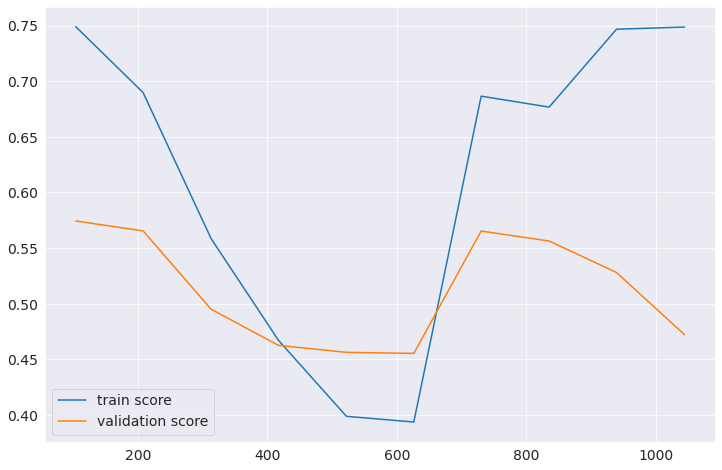

 
RidgeRegression
Train score: 0.7779172758422138
Test score: 0.2177092947180992
 
R² : 0.47275788844263394
MSE : 503722183011843.2
RMSE : 20075249.381919123
 


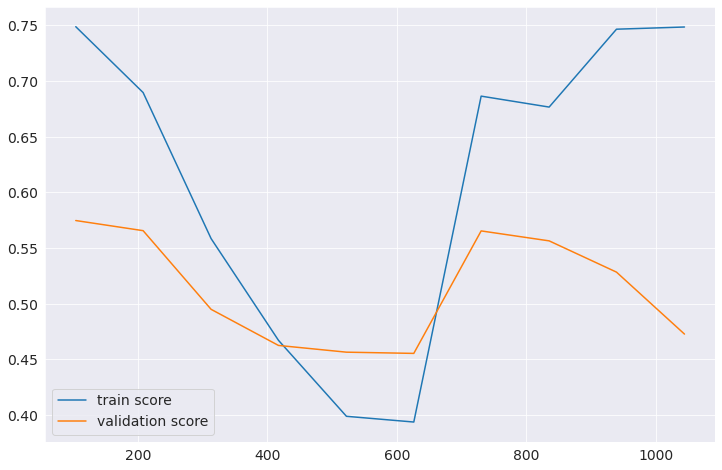

 
RandomForest
Train score: 0.9006810844562871
Test score: 0.18215750072718107
 
R² : 0.4975637361800341
MSE : 533009835819941.8
RMSE : 19706148.776589192
 


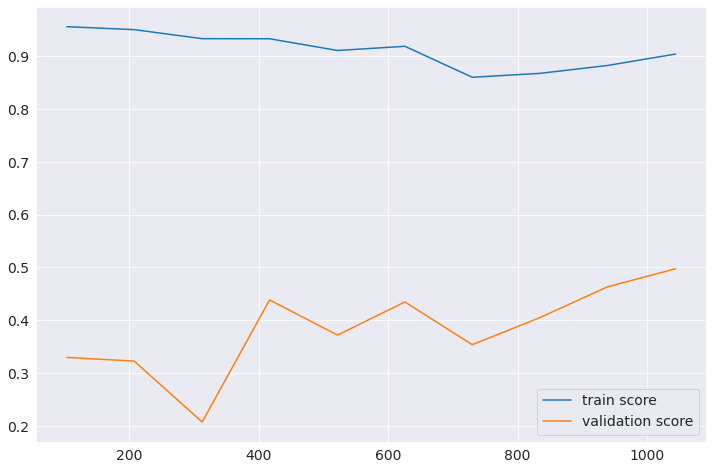

 
DecisionTree
Train score: 0.9996601907264364
Test score: 0.04627092228576846
 
R² : 0.22032143199365084
MSE : 622624496353001.8
RMSE : 23321617.67488403
 


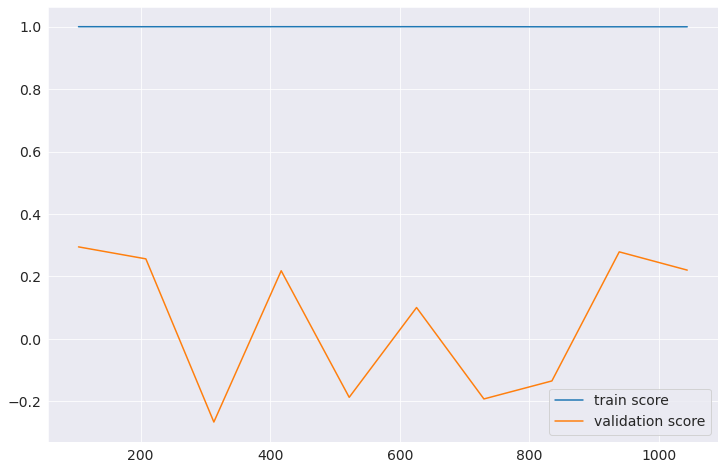

 
AdaBoost
Train score: 0.8654309461684029
Test score: 0.22553459374606943
 
R² : 0.32021482585217637
MSE : 602276983980088.1
RMSE : 22196806.703467667
 


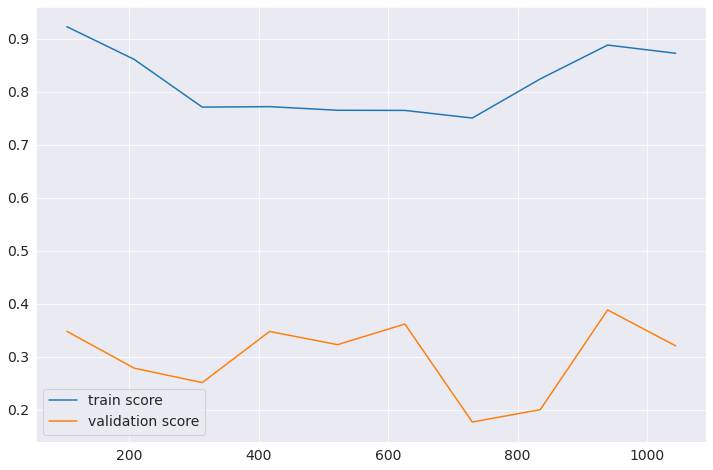

 
KNN
Train score: 0.5628474234042183
Test score: 0.28915964526704374
 
R² : 0.4110983358358748
MSE : 586382643730170.0
RMSE : 21193384.341735143
 


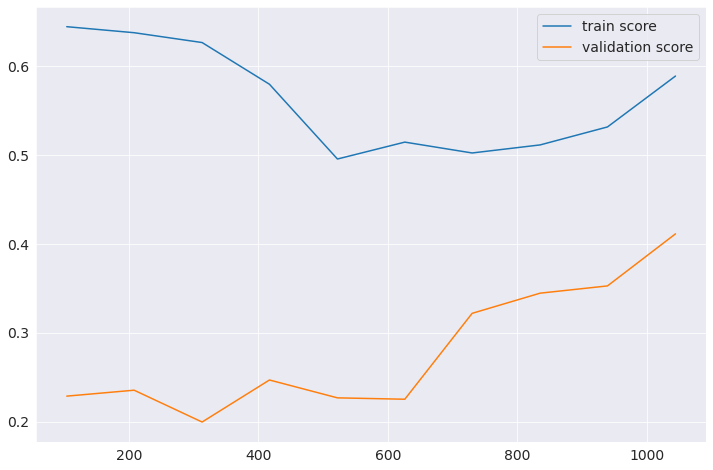

In [ ]:
for name, model in dict_of_models.items():
  print(name)
  evaluation(model)

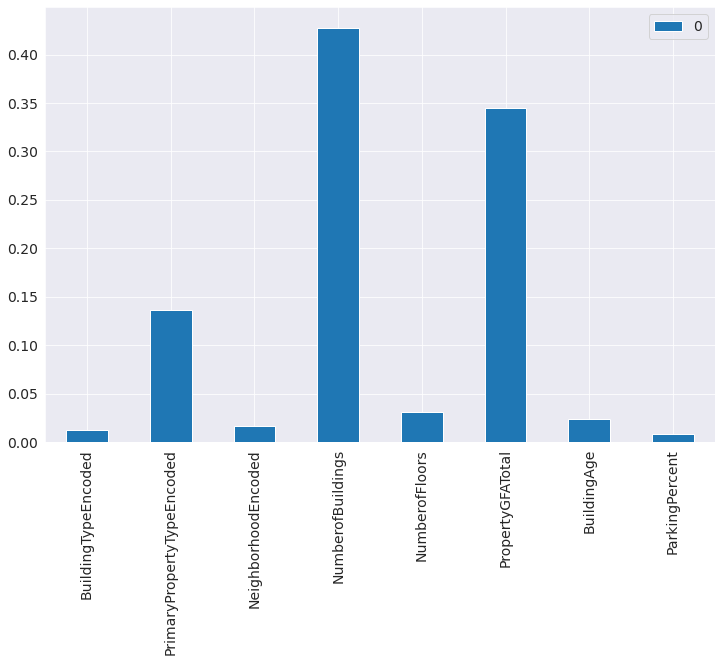

In [ ]:
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

**Optimisation**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
KNN

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=3,
                                              score_func=<function f_regression at 0x7fd13ace2c20>))])),
                ('robustscaler', RobustScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
hyper_params = {"kneighborsregressor__n_neighbors":[2,3,4,5,6,7,8],
                "kneighborsregressor__weights":["uniform", "distance"],
                "pipeline__selectkbest__k":[2,3,4,5,6,7,8]}

In [ ]:
now = time.time()


grid = GridSearchCV(KNN, hyper_params, scoring="r2", cv=10)

grid.fit(X_train, y_train)

print(grid.best_params_)

later = time.time()
difference = int(later - now)

print("Temps de calcul :", difference, " secondes.")

{'kneighborsregressor__n_neighbors': 7, 'kneighborsregressor__weights': 'distance', 'pipeline__selectkbest__k': 5}
Temps de calcul : 10  secondes.


Train score: 0.9996698807422736
Test score: 0.2938104327454315
 
R² : 0.43373866915663883
MSE : 622074864185341.2
RMSE : 21404337.12603741
 


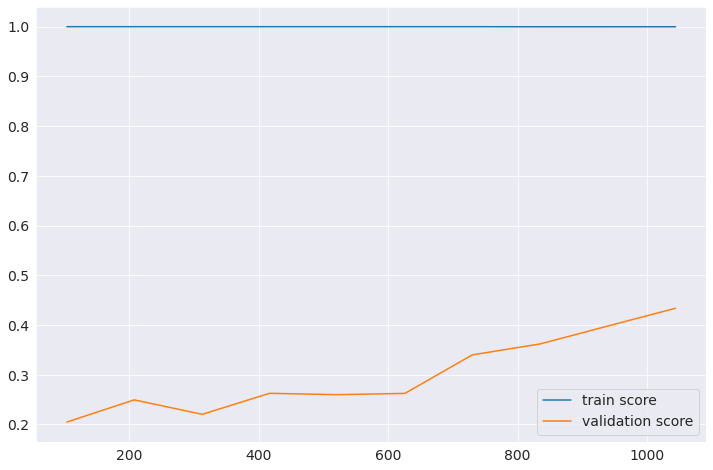

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
hyper_params = {"kneighborsregressor__n_neighbors": range(1,100),
                "kneighborsregressor__weights":["uniform", "distance"],
                "pipeline__selectkbest__k": range(2,8)}

In [ ]:
now = time.time()


grid = RandomizedSearchCV(KNN, hyper_params, scoring="r2", cv=10, n_iter=50)

grid.fit(X_train, y_train)

print(grid.best_params_)

later = time.time()
difference = int(later - now)

print("Temps de calcul :", difference, " secondes.")

{'pipeline__selectkbest__k': 5, 'kneighborsregressor__weights': 'uniform', 'kneighborsregressor__n_neighbors': 25}
Temps de calcul : 5  secondes.


Train score: 0.3247470423899145
Test score: 0.2154206922276436
 
R² : 0.36027085651658
MSE : 727248528685560.5
RMSE : 23096369.98236607
 


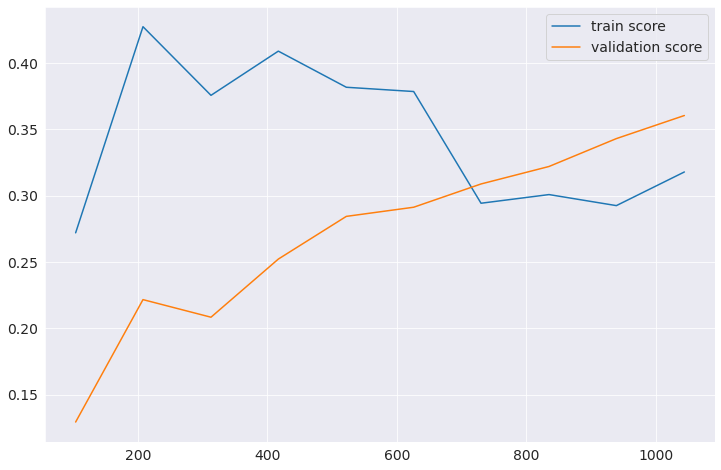

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=3,
                                              score_func=<function f_regression at 0x7fd13ace2c20>))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [ ]:
hyper_params = {"randomforestregressor__criterion":["squared_error", "absolute_error", "poisson"],
                "pipeline__selectkbest__k": range(2,8)}

In [ ]:
now = time.time()


grid = RandomizedSearchCV(RandomForest, hyper_params, scoring="r2", cv=10, n_iter=50)

grid.fit(X_train, y_train)

print(grid.best_params_)

later = time.time()
difference = int(later - now)

print("Temps de calcul :", difference, " secondes.")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.



{'randomforestregressor__criterion': 'squared_error', 'pipeline__selectkbest__k': 7}
Temps de calcul : 196  secondes.


Train score: 0.8896569055409402
Test score: 0.337585424048395
 
R² : 0.5836033203374023
MSE : 557729803022259.0
RMSE : 18712691.041858815
 


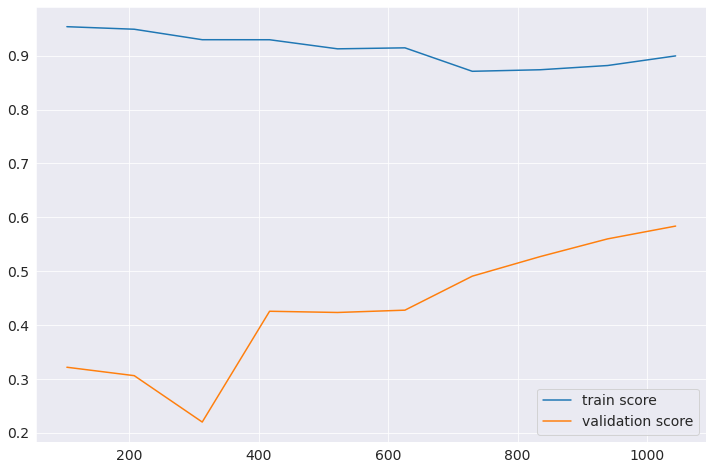

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
hyper_params = {"randomforestregressor__criterion":["squared_error", "absolute_error", "poisson"],
                "randomforestregressor__n_estimators":[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                "randomforestregressor__max_features":['auto', 'sqrt'],
                "randomforestregressor__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)],
                "randomforestregressor__min_samples_split":[2, 5, 10],
                "randomforestregressor__min_samples_leaf":[1, 2, 4],
                "randomforestregressor__bootstrap":[True, False],
                "pipeline__selectkbest__k": range(2,8)}

In [ ]:
now = time.time()


grid = RandomizedSearchCV(RandomForest, hyper_params, scoring="r2", cv=3, n_iter=100)

grid.fit(X_train, y_train)

print(grid.best_params_)

later = time.time()
difference = int(later - now)

print("Temps de calcul :", difference, " secondes.")

{'randomforestregressor__n_estimators': 600, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': 70, 'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__bootstrap': True, 'pipeline__selectkbest__k': 5}
Temps de calcul : 2540  secondes.


Train score: 0.8825642826203403
Test score: 0.3028985693871564
 
R² : 0.6037889859439083
MSE : 531814126381147.4
RMSE : 18417554.613425005
 


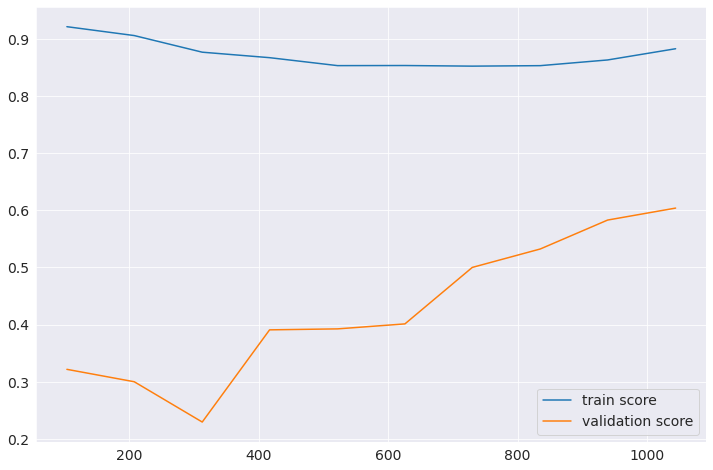

In [ ]:
evaluation(grid.best_estimator_)

Deuxième target : TotalGHGEmissions

Sélection des colonnes à fournir au modèle :

In [ ]:
X = data[["BuildingTypeEncoded","PrimaryPropertyTypeEncoded","NeighborhoodEncoded","NumberofBuildings","NumberofFloors","PropertyGFATotal","BuildingAge","ParkingPercent"]]
y = data["TotalGHGEmissions"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20% des données dans le jeu de test

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (1305, 8)
Test set: (327, 8)


LinearRegression
Train score: 0.38986323833422243
Test score: 0.08295455058866696
 
R² : -1.9534009178716076
MSE : 1613263.1560057316
RMSE : 975.2889887320878
 


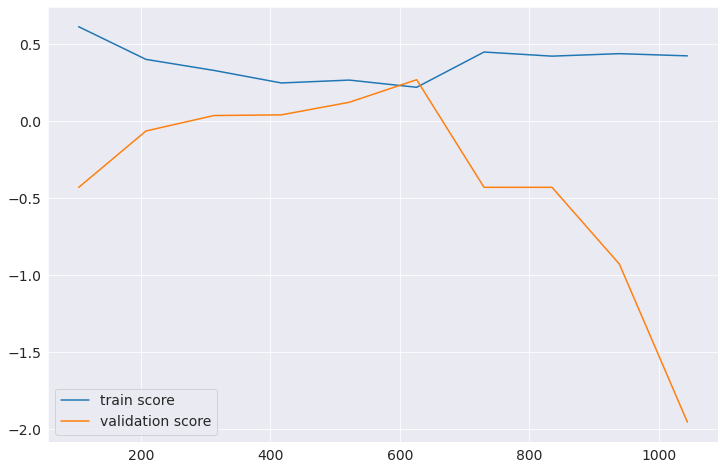

 
RidgeRegression
Train score: 0.3898632335088267
Test score: 0.08294769458509854
 
R² : -1.946555198408311
MSE : 1609300.4424107294
RMSE : 974.5106091350093
 


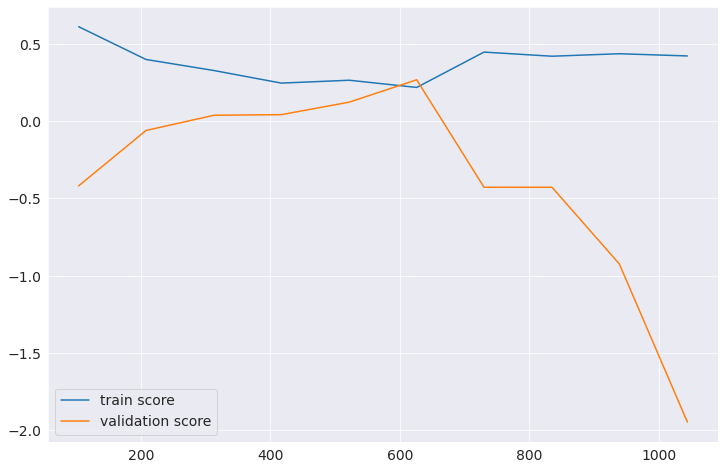

 
RandomForest
Train score: 0.9354314865521615
Test score: 0.09223409436701668
 
R² : 0.36127319783340806
MSE : 232196.26937781592
RMSE : 478.04998857440535
 


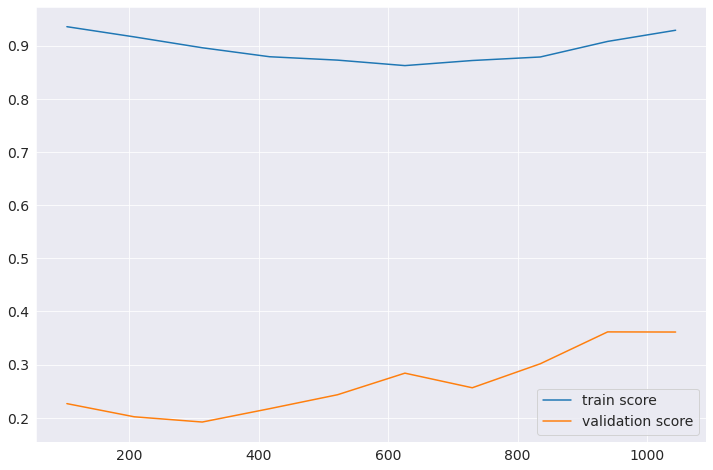

 
DecisionTree
Train score: 0.9999279711635932
Test score: 0.005405906573333064
 
R² : 0.21385696679169727
MSE : 292366.40788552637
RMSE : 518.8230366204525
 


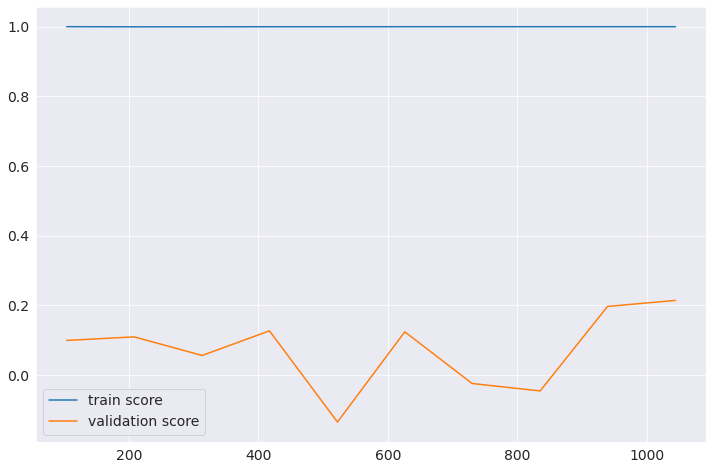

 
AdaBoost
Train score: 0.8044680401451458
Test score: 0.028239318015013004
 
R² : 0.46595931198187246
MSE : 188105.49475482487
RMSE : 419.2141002924245
 


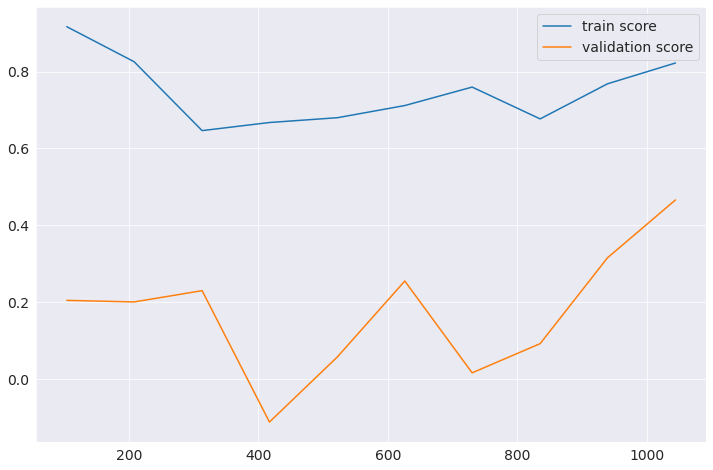

 
KNN
Train score: 0.6144646228164451
Test score: 0.17360881721030985
 
R² : 0.4031607042372915
MSE : 247457.72067165366
RMSE : 484.88874430767527
 


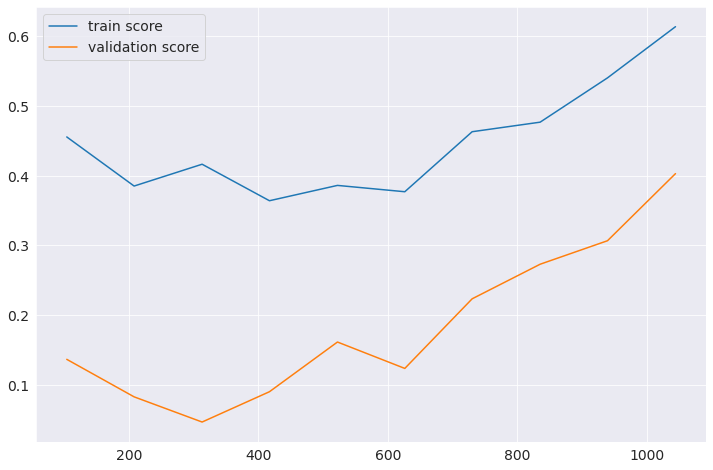

In [ ]:
for name, model in dict_of_models.items():
  print(name)
  evaluation(model)

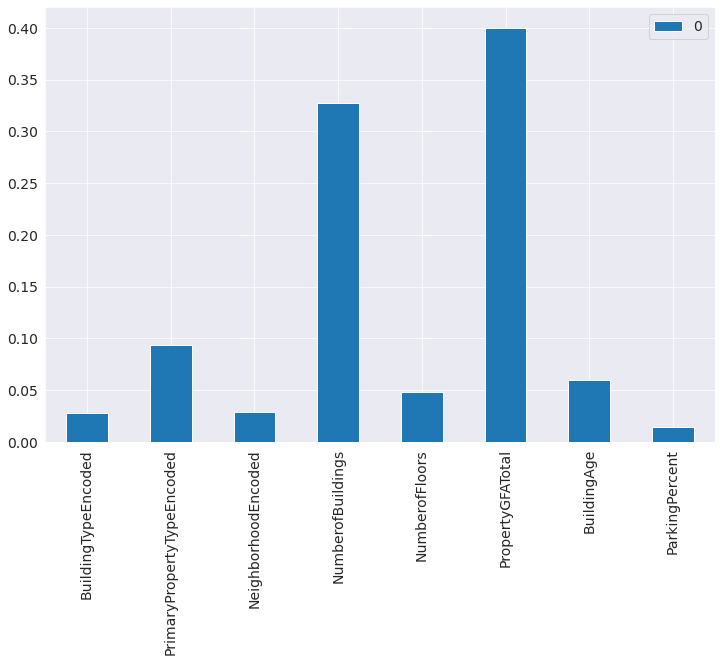

In [ ]:
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
KNN

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=3,
                                              score_func=<function f_regression at 0x7f8465d090e0>))])),
                ('robustscaler', RobustScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
hyper_params = {"kneighborsregressor__n_neighbors":[2,3,4,5,6,7,8],
                "kneighborsregressor__algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
                "kneighborsregressor__p":[1,2],
                "kneighborsregressor__leaf_size":[10,20,30,40,50],
                "kneighborsregressor__weights":["uniform", "distance"],
                "pipeline__selectkbest__k":[2,3,4,5,6,7,8]}

In [ ]:
grid = GridSearchCV(KNN, hyper_params, scoring="r2", cv=10)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'kneighborsregressor__algorithm': 'auto', 'kneighborsregressor__leaf_size': 40, 'kneighborsregressor__n_neighbors': 3, 'kneighborsregressor__p': 1, 'kneighborsregressor__weights': 'distance', 'pipeline__selectkbest__k': 5}


Train score: 0.9999752594017891
Test score: 0.23819971793813965
 
R² : 0.47828460837376346
MSE : 200014.66668521898
RMSE : 436.0923775942282
 


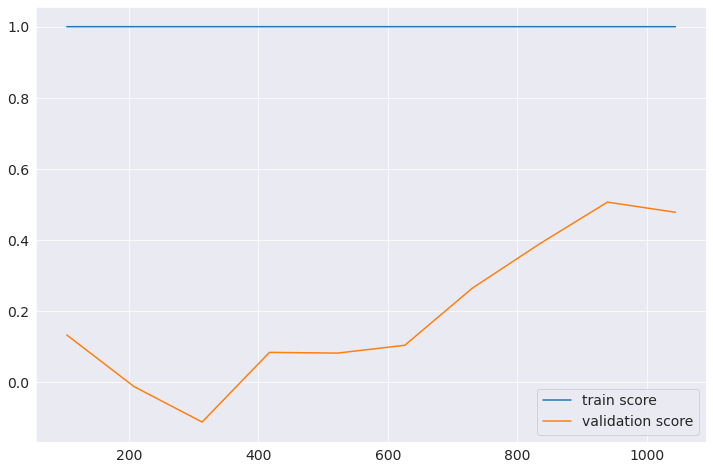

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
hyper_params = {"kneighborsregressor__n_neighbors":[3],
                "kneighborsregressor__algorithm":['auto'],
                "kneighborsregressor__p":[1],
                "kneighborsregressor__leaf_size":[40],
                "kneighborsregressor__weights":["distance"],
                "pipeline__selectkbest__k":[5]}

In [ ]:
grid = GridSearchCV(KNN, hyper_params, scoring="r2", cv=10)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'kneighborsregressor__algorithm': 'auto', 'kneighborsregressor__leaf_size': 40, 'kneighborsregressor__n_neighbors': 3, 'kneighborsregressor__p': 1, 'kneighborsregressor__weights': 'distance', 'pipeline__selectkbest__k': 5}


Train score: 0.9999752594017891
Test score: 0.2295845351354735
 
R² : 0.44452702111003256
MSE : 208977.97686574358
RMSE : 450.15299082538706
 


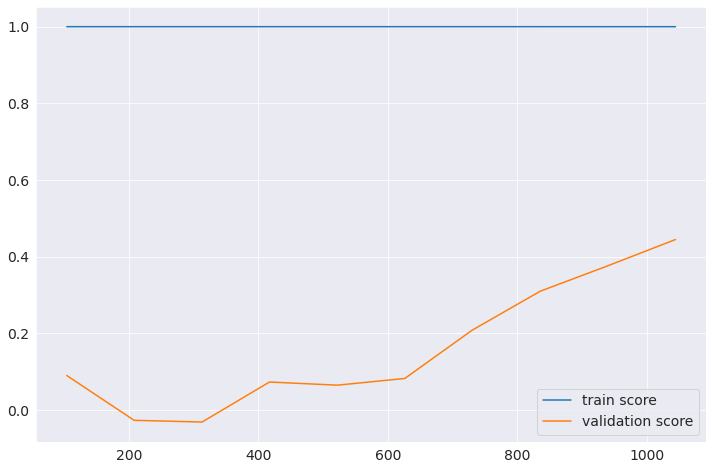

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
AdaBoost

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=3,
                                              score_func=<function f_regression at 0x7f8465d090e0>))])),
                ('adaboostregressor', AdaBoostRegressor(random_state=0))])

In [ ]:
hyper_params = {"adaboostregressor__n_estimators":[1,10,20,30,40,50],
                "adaboostregressor__loss":['linear', 'square', 'exponential'],
                "adaboostregressor__learning_rate":[1,10,100,1000],
                "pipeline__selectkbest__k":[2,3,4,5,6,7,8]}

In [ ]:
now = time.time()

grid = GridSearchCV(AdaBoost, hyper_params, scoring="r2", cv=4)

grid.fit(X_train, y_train)

print(grid.best_params_)

later = time.time()
difference = int(later - now)

print("Temps de calcul :", difference, " secondes.")

{'adaboostregressor__learning_rate': 1, 'adaboostregressor__loss': 'square', 'adaboostregressor__n_estimators': 20, 'pipeline__selectkbest__k': 6}
Temps de calcul : 67  secondes.


Train score: 0.8599378227880596
Test score: 0.0770119136531413
 
R² : 0.4306880463248369
MSE : 205172.51192206453
RMSE : 441.2989521526526
 


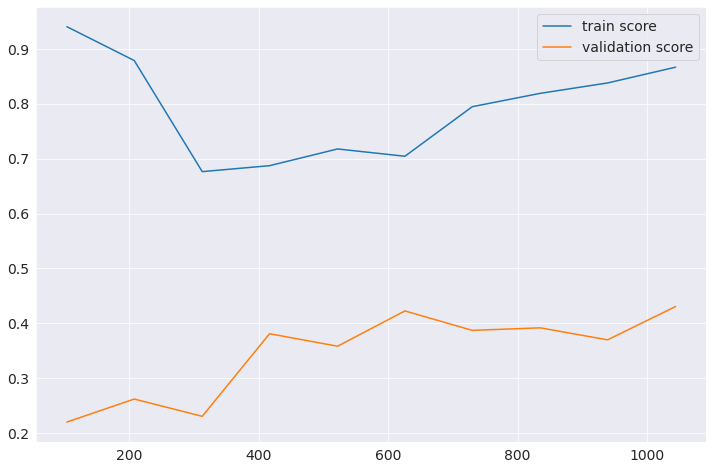

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=3,
                                              score_func=<function f_regression at 0x7f8465d090e0>))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [ ]:
hyper_params = {"randomforestregressor__criterion":["absolute_error"],
                "randomforestregressor__n_estimators":[600],
                "randomforestregressor__max_features":['auto'],
                "randomforestregressor__max_depth":[70],
                "randomforestregressor__min_samples_split":[2],
                "randomforestregressor__min_samples_leaf":[1],
                "randomforestregressor__bootstrap":[True],
                "pipeline__selectkbest__k":[5]}

In [ ]:
now = time.time()


grid = GridSearchCV(RandomForest, hyper_params, scoring="r2", cv=4)

grid.fit(X_train, y_train)

print(grid.best_params_)

later = time.time()
difference = int(later - now)

print("Temps de calcul :", difference, " secondes.")

{'pipeline__selectkbest__k': 5, 'randomforestregressor__bootstrap': True, 'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__max_depth': 70, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 600}
Temps de calcul : 82  secondes.


Train score: 0.9543307877656323
Test score: 0.25110063867190446
 
R² : 0.556122631885261
MSE : 161161.03326781496
RMSE : 397.4441474960368
 


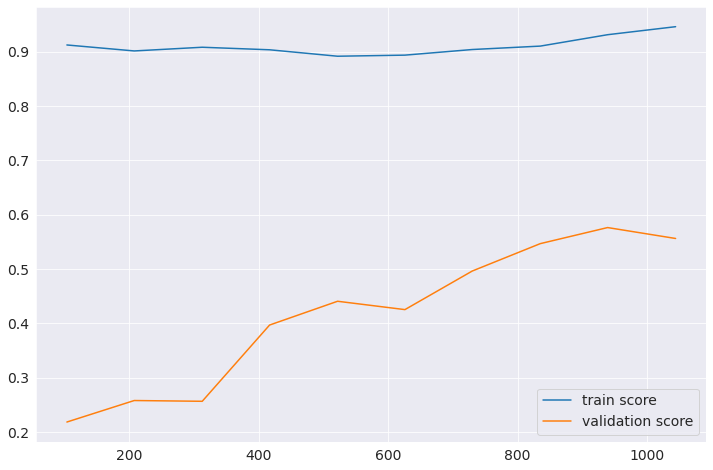

In [ ]:
evaluation(grid.best_estimator_)

Intérêt de l'ENERGY STAR SCORE

In [ ]:
data_with_score = data.copy()
data_without_score = data.copy()

In [ ]:
data_with_score = data_with_score.dropna(subset=['ENERGYSTARScore'])

Test du modèle - ENERGYSTARScore *non inclus*



In [ ]:
X = data_without_score[["BuildingTypeEncoded","PrimaryPropertyTypeEncoded","NeighborhoodEncoded","NumberofBuildings","NumberofFloors","PropertyGFATotal","BuildingAge","ParkingPercent"]]
y = data_without_score["SiteEnergyUse(kBtu)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20% des données dans le jeu de test

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (1305, 8)
Test set: (327, 8)


In [ ]:
preprocessor = make_pipeline(SelectKBest(f_regression, k=5))

In [ ]:
RandomForest = make_pipeline(preprocessor, RandomForestRegressor(random_state=0,
                                                                 n_estimators=200,
                                                                 min_samples_split=5,
                                                                 min_samples_leaf=1,
                                                                 max_features='auto',
                                                                 max_depth=50,
                                                                 criterion='absolute_error',
                                                                 bootstrap='True'))

Train score: 0.8825642826203403
Test score: 0.3028985693871564
 
R² : 0.6037889859439083
MSE : 531814126381147.4
RMSE : 18417554.613425005
 


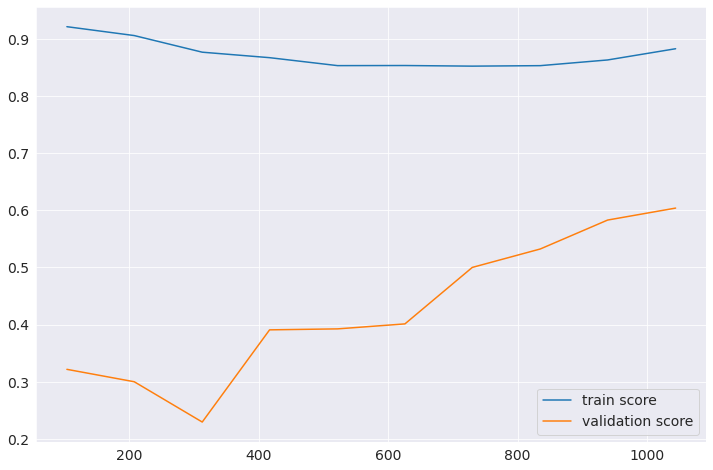

In [ ]:
evaluation(RandomForest)

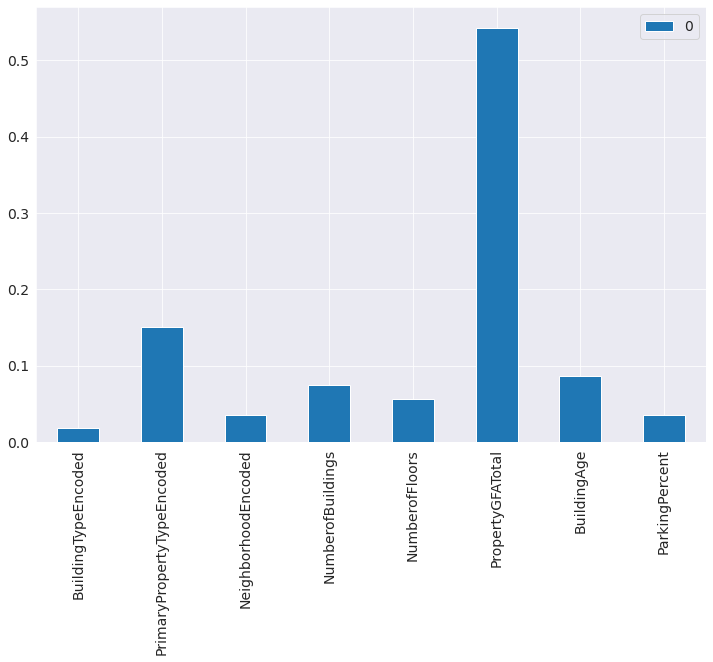

In [ ]:
model = RandomForestRegressor(random_state=0,
                              n_estimators=200,
                              min_samples_split=5,
                              min_samples_leaf=1,
                              max_features='auto',
                              max_depth=50,
                              criterion='absolute_error',
                              bootstrap='True')

model.fit(X_train, y_train)

pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

Test du modèle - ENERGYSTARScore *inclus*

In [ ]:
X = data_with_score[["ENERGYSTARScore","BuildingTypeEncoded","PrimaryPropertyTypeEncoded","NeighborhoodEncoded","NumberofBuildings","NumberofFloors","PropertyGFATotal","BuildingAge","ParkingPercent"]]
y = data_with_score["SiteEnergyUse(kBtu)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20% des données dans le jeu de test

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (860, 9)
Test set: (216, 9)


Train score: 0.8806211627671613
Test score: 0.03079324771092007
 
R² : 0.5295457522850249
MSE : 325144575248624.9
RMSE : 15248121.522883743
 


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correla

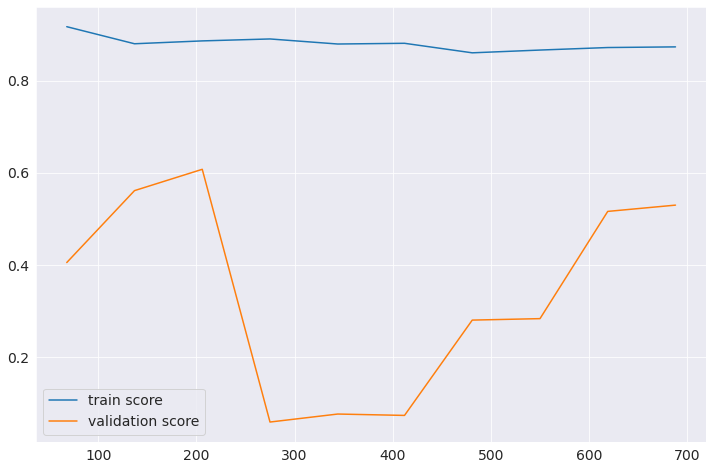

In [ ]:
evaluation(RandomForest)

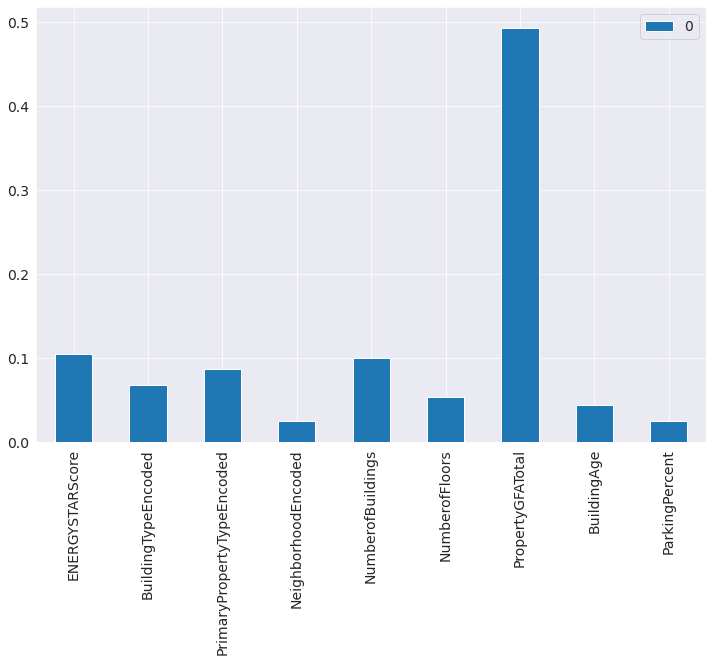

In [ ]:
model = RandomForestRegressor(random_state=0,
                              n_estimators=200,
                              min_samples_split=5,
                              min_samples_leaf=1,
                              max_features='auto',
                              max_depth=50,
                              criterion='absolute_error',
                              bootstrap='True')

model.fit(X_train, y_train)

pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))